# Кластеризация данных сотрудников

Это набор данных предоставляет 10000 записей о сотрудниках.Данный набор предназначен для анализа кадровых тенденций, эффективности сотрудников, производительности и внутренних взаимодействиях в компании.


# Описание набора данных

База данных сотрудников содержит персональную информацию, контактные данные и сведения о должностях 10 000 работников.
Расшифровка каждого атрибута:
- Index - персональный индекс сотрудника
- First name - Имя сотрудника
- Last name - Фамилия сотрудника
- Sex - Пол сотрудника
- Email - Почта сотрудника
- Phone - Телефон сотрудника
- Date of birth - День рождения сотрудника
- Job Title - Должность

# Загрузка данных

## Подключение необходимых библиотек и функций

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install openpyxl
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

## Обзор датасета

In [2]:
df = pd.read_csv("Employee 1000x.csv")

In [3]:
df

,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,Sara,Mcguire,Female,tsharp@example.net,(971)643-6089x9160,17-08-21,"Editor, commissioning"
1,2,Alisha,Hebert,Male,vincentgarrett@example.net,+1-114-355-1841x78347,28-06-69,Broadcast engineer
2,3,Gwendolyn,Sheppard,Male,mercadojonathan@example.com,9017807728,25-09-15,Industrial buyer
3,4,Kristine,Mccann,Female,lindsay55@example.com,+1-607-333-9911x59088,27-07-78,Multimedia specialist
4,5,Bobby,Pittman,Female,blevinsmorgan@example.com,3739847538,17-11-89,Planning and development surveyor
...,...,...,...,...,...,...,...,...
9995,9996,Tina,Sherman,Male,bartlettcolleen@example.org,(455)476-4044x5755,28-07-74,"Scientist, physiological"
9996,9997,Earl,Jennings,Female,andreabenton@example.com,009.056.6505,20-08-32,Warehouse manager
9997,9998,Ellen,Dominguez,Female,michaelayoder@example.net,409-428-4297x469,06-06-66,Lawyer
9998,9999,Emma,Clark,Male,pstrickland@example.com,849-868-8653,09-05-07,Accounting technician


# Разведочный анализ

## Общая информация

In [4]:
df.shape

(10000, 8)

Датасет хранит в себе 10000 записей и 8 столбцов.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          10000 non-null  int64 
 1   First Name     10000 non-null  object
 2   Last Name      10000 non-null  object
 3   Sex            10000 non-null  object
 4   Email          10000 non-null  object
 5   Phone          10000 non-null  object
 6   Date of birth  10000 non-null  object
 7   Job Title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 351.6+ KB


Датасет полностью заполнен, содержит 8 колонок и 10 тысяч записей. Типы данных: одна колонка числовая, а остальные — текстовые.

In [6]:
df.describe(include = "O")

,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
count,10000,10000,10000,10000,10000,10000,10000
unique,690,1000,2,9936,9992,8646,639
top,Martin,Velazquez,Female,kmendoza@example.org,-1415,22-12-06,Film/video editor
freq,28,22,5074,3,2,4,30


Этот набор не содержит пропуски. Однако в номерах телефона присутствуют аномалии.

In [7]:
print(df.duplicated().sum())

0


Дубликаты не найдены.

<ipython-input-8-907f9128862c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='viridis')


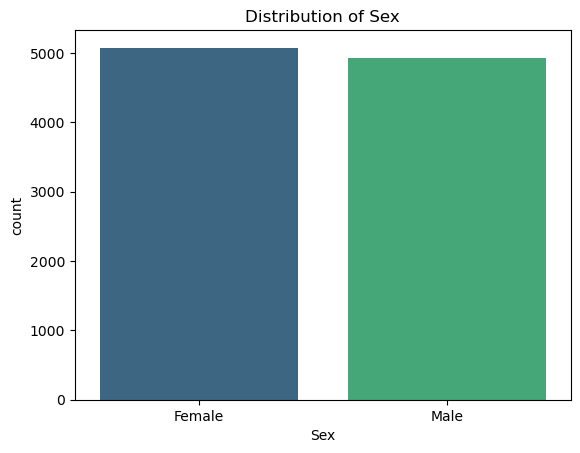

In [8]:
sns.countplot(data=df, x='Sex', palette='viridis')
plt.title('Distribution of Sex')
plt.show()

В компании женщин немного больше,чем мужчин

In [9]:
df["Job Title"].value_counts()

Job Title
Film/video editor           30
Medical secretary           28
Wellsite geologist          28
Exhibition designer         27
Probation officer           27
                            ..
Fish farm manager            7
Waste management officer     7
Chief Financial Officer      5
Theatre director             5
Holiday representative       5
Name: count, Length: 639, dtype: int64

более популярная должность это видеоредактор. Но нельзя сказать,что она распространена в компании т.к. записей всего 10000.

In [10]:
from datetime import datetime
df["Date of birth"] = pd.to_datetime(df["Date of birth"], format='%d-%m-%y')
df["Age"] = df["Date of birth"].apply(lambda x: datetime.now().year - x.year)
df = df[df["Age"] > 14]

In [11]:
df

,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Age
1,2,Alisha,Hebert,Male,vincentgarrett@example.net,+1-114-355-1841x78347,1969-06-28,Broadcast engineer,57
3,4,Kristine,Mccann,Female,lindsay55@example.com,+1-607-333-9911x59088,1978-07-27,Multimedia specialist,48
4,5,Bobby,Pittman,Female,blevinsmorgan@example.com,3739847538,1989-11-17,Planning and development surveyor,37
6,7,Collin,Allison,Male,yvaughn@example.net,(314)591-7413,1979-11-21,Administrator,47
7,8,Nicholas,Branch,Male,greerjimmy@example.net,-7199,2006-01-21,Fisheries officer,20
...,...,...,...,...,...,...,...,...,...
9987,9988,Sara,Mcdowell,Female,bguerra@example.org,893.231.7728x932,2006-09-17,Health and safety adviser,20
9990,9991,Candace,Fox,Female,colonleah@example.org,2545939740,1980-10-05,Stage manager,46
9991,9992,Benjamin,Vaughn,Female,martha85@example.com,4812845866,2005-07-23,Marine scientist,21
9995,9996,Tina,Sherman,Male,bartlettcolleen@example.org,(455)476-4044x5755,1974-07-28,"Scientist, physiological",52


Исправили формат дня рождения

In [12]:
df["Age"]

1       57
3       48
4       37
6       47
7       20
        ..
9987    20
9990    46
9991    21
9995    52
9998    19
Name: Age, Length: 4231, dtype: int64

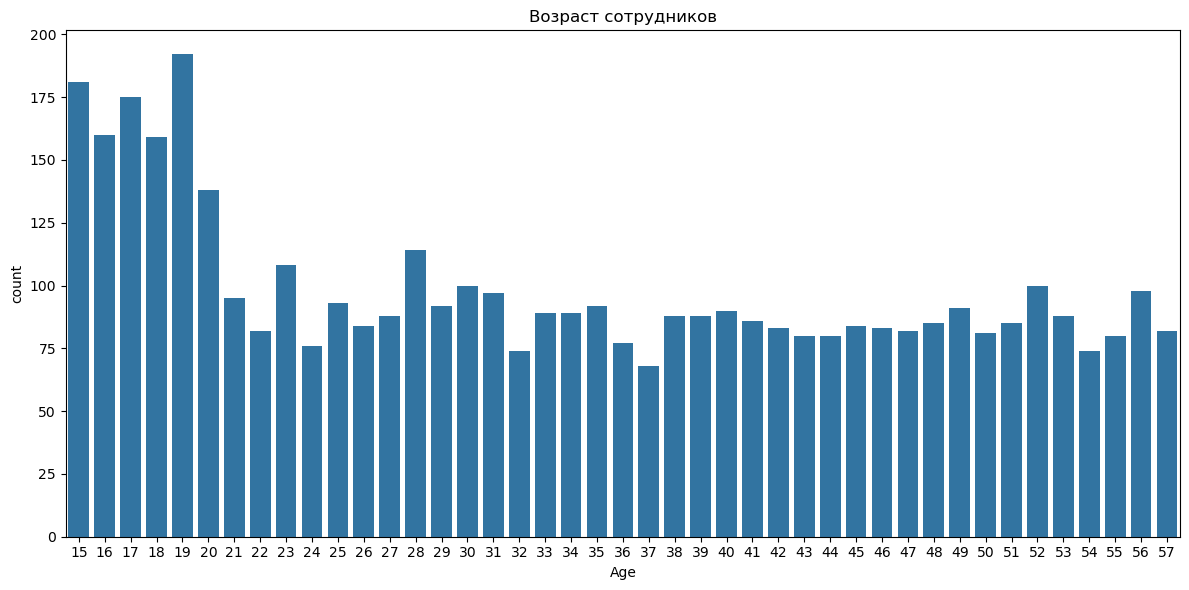

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age')
plt.title('Возраст сотрудников')
plt.tight_layout()
plt.show()

<ipython-input-16-7af6e53a8cd9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_10_job_data, x="Job Title", y="Age", palette="viridis", ci=None)
<ipython-input-16-7af6e53a8cd9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_job_data, x="Job Title", y="Age", palette="viridis", ci=None)


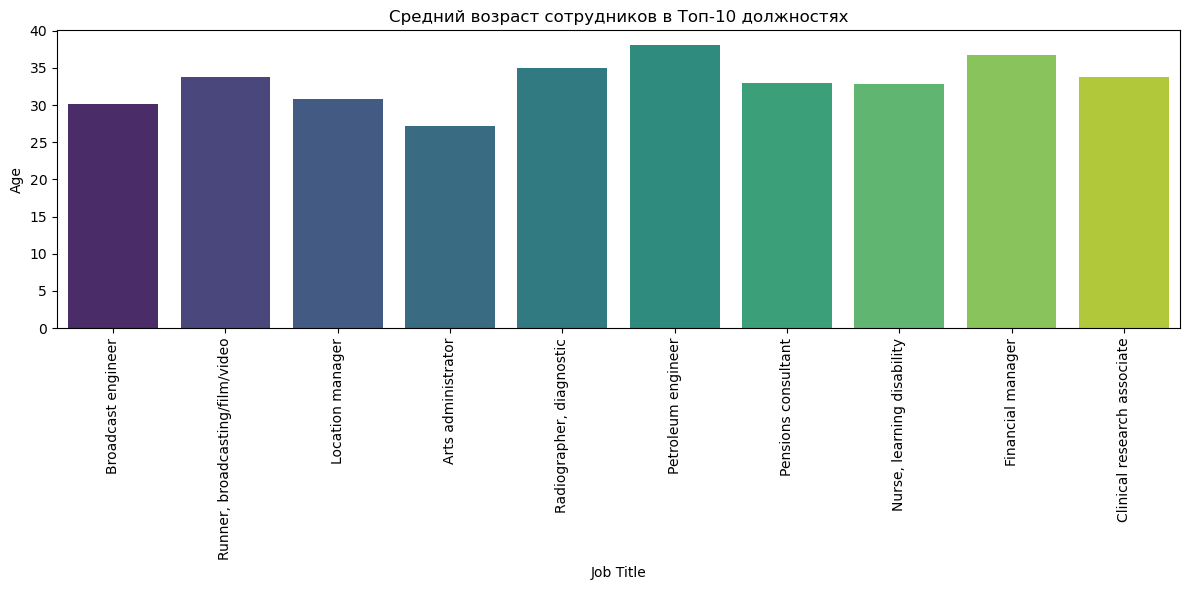

In [16]:
top_10_jobs = df["Job Title"].value_counts().head(10).index
top_10_job_data = df[df["Job Title"].isin(top_10_jobs)]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_job_data, x="Job Title", y="Age", palette="viridis", ci=None)
plt.title("Средний возраст сотрудников в Топ-10 должностях")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()